In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt', sep=" ")

In [18]:
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [20]:
df.tail()

,name,calories,sodium,alcohol,cost
15,Pabst_Extra_Light,68,15,2.3,0.38
16,Hamms,139,19,4.4,0.43
17,Heilemans_Old_Style,144,24,4.9,0.43
18,Olympia_Goled_Light,72,6,2.9,0.46
19,Schlitz_Light,97,7,4.2,0.47


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [22]:
df.shape[0]

20

In [23]:
df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

In [24]:
df.index

RangeIndex(start=0, stop=20, step=1)

In [25]:
c = df.groupby('calories')
c = c.sum()
c = c.sort_values(['sodium'], ascending = False)
c.head(1)

,sodium,alcohol,cost
calories,,,
144,39,9.6,0.86


In [26]:
c = df.groupby('sodium').sum()
c = c.sort_values(['cost'], ascending = False)
c.head(1)

,calories,alcohol,cost
sodium,,,
15,471,12.0,1.75


In [27]:
filtered = df.drop_duplicates(['calories'])
filtered

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [28]:
one_prod = filtered[filtered.name == "Pabst_Extra_Light"]
one_prod

,name,calories,sodium,alcohol,cost
15,Pabst_Extra_Light,68,15,2.3,0.38


In [30]:
df.groupby('calories').sodium.mean()

calories
68     15.0
72      6.0
97      7.0
99     10.0
102    15.0
113     8.0
135    11.0
139    19.0
140    18.0
144    19.5
145    23.0
149    16.5
150    19.0
151    19.0
152    11.0
157    15.0
170     7.0
175    24.0
Name: sodium, dtype: float64

In [32]:
df.groupby('sodium').cost.describe()

,count,mean,std,min,25%,50%,75%,max
sodium,,,,,,,,
6,2.0,0.6250,0.233345,0.46,0.5425,0.625,0.7075,0.79
7,2.0,0.6000,0.183848,0.47,0.5350,0.600,0.6650,0.73
8,1.0,0.4000,NaN,0.40,0.4000,0.400,0.4000,0.40
10,1.0,0.4300,NaN,0.43,0.4300,0.430,0.4300,0.43
11,2.0,0.6350,0.190919,0.50,0.5675,0.635,0.7025,0.77
15,4.0,0.4375,0.043493,0.38,0.4175,0.445,0.4650,0.48
18,1.0,0.4400,NaN,0.44,0.4400,0.440,0.4400,0.44
19,3.0,0.5400,0.190526,0.43,0.4300,0.430,0.5950,0.76
23,1.0,0.2800,NaN,0.28,0.2800,0.280,0.2800,0.28


In [33]:
df.iloc[:3]

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48


In [34]:
df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

In [35]:
df.loc[:,['sodium', 'alcohol']].head()

,sodium,alcohol
0,15,4.7
1,19,4.9
2,15,0.9
3,7,5.2
4,11,5.0


In [36]:
df[['calories']].head()

,calories
0,144
1,151
2,157
3,170
4,152


In [37]:
df.loc[df.index[[2,3]],['calories', 'sodium']]

,calories,sodium
2,157,15
3,170,7


In [38]:
df[df['calories']>157]

,name,calories,sodium,alcohol,cost
3,Kronenbourg,170,7,5.2,0.73
6,Augsberger,175,24,5.5,0.40


In [39]:
df[df['calories'].between(100, 200)]

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
9,Budweiser_Light,113,8,3.7,0.40
10,Coors,140,18,4.6,0.44


In [40]:
df.groupby('calories')['sodium'].mean()

calories
68     15.0
72      6.0
97      7.0
99     10.0
102    15.0
113     8.0
135    11.0
139    19.0
140    18.0
144    19.5
145    23.0
149    16.5
150    19.0
151    19.0
152    11.0
157    15.0
170     7.0
175    24.0
Name: sodium, dtype: float64

In [41]:
df.sort_values(by=['calories', 'sodium'], ascending=[False, True])

,name,calories,sodium,alcohol,cost
6,Augsberger,175,24,5.5,0.40
3,Kronenbourg,170,7,5.2,0.73
2,Lowenbrau,157,15,0.9,0.48
4,Heineken,152,11,5.0,0.77
1,Schlitz,151,19,4.9,0.43
13,Becks,150,19,4.7,0.76
14,Kirin,149,6,5.0,0.79
7,Srohs_Bohemian_Style,149,27,4.7,0.42
5,Old_Milwaukee,145,23,4.6,0.28
0,Budweiser,144,15,4.7,0.43


In [42]:
df.pivot_table(index='calories', columns='alcohol', values='cost', aggfunc='mean')

alcohol,0.9,2.3,2.9,3.7,4.1,4.2,4.3,4.4,4.6,4.7,4.9,5.0,5.2,5.5
calories,,,,,,,,,,,,,,
68,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,NaN,NaN


# New operations

In [43]:
df['calories'].unique()

array([144, 151, 157, 170, 152, 145, 175, 149,  99, 113, 140, 102, 135,
       150,  68, 139,  72,  97], dtype=int64)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,20.0,132.5500,30.283702,68.00,110.2500,144.000,150.250,175.00
sodium,20.0,14.9500,6.581273,6.00,9.5000,15.000,19.000,27.00
alcohol,20.0,4.2400,1.087924,0.90,4.1750,4.600,4.900,5.50
cost,20.0,0.4945,0.144858,0.28,0.4275,0.435,0.485,0.79


In [45]:
df.corr()

,calories,sodium,alcohol,cost
calories,1.000000,0.415271,0.486213,0.328140
sodium,0.415271,1.000000,0.223025,-0.432573
alcohol,0.486213,0.223025,1.000000,0.259292
cost,0.328140,-0.432573,0.259292,1.000000


In [46]:
def Var_Summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.var(), x.std(), 
                      x.min(),x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25), 
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), 
                      x.quantile(0.99), x.max()],
                      index=['Count','Missing Values', 'Sum','Mean','Median', 'VAR', 'STD', 'MIN','P1','P5','P10',
                             'P25','P50','P75','P90','P99','Max'])


In [47]:
Var_Summary(df).T

Count             name        20
calories    20
sodium      20
a...
Missing Values    name        0
calories    0
sodium      0
alco...
Sum               name        BudweiserSchlitzLowenbrauKronenbou...
Mean              calories    132.5500
sodium       14.9500
alco...
Median            calories    144.000
sodium       15.000
alcoho...
VAR               calories    917.102632
sodium       43.313158
...
STD               calories    30.283702
sodium       6.581273
al...
MIN               name        Augsberger
calories            68
...
P1                calories    68.760
sodium       6.000
alcohol ...
P5                calories    71.800
sodium       6.000
alcohol ...
P10               calories    94.500
sodium       6.900
alcohol ...
P25               calories    110.2500
sodium        9.5000
alco...
P50               calories    144.000
sodium       15.000
alcoho...
P75               calories    150.250
sodium       19.000
alcoho...
P90               calories    158.300
sodium    

In [48]:
df.isna().sum()

name        0
calories    0
sodium      0
alcohol     0
cost        0
dtype: int64

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

<IPython.core.display.Javascript object>

<AxesSubplot:>

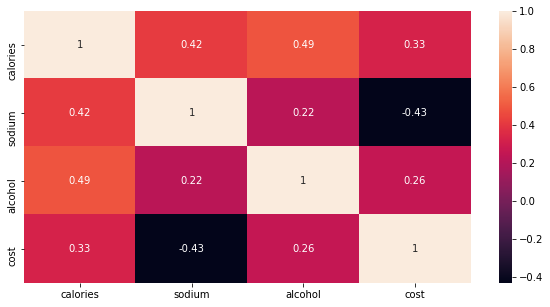

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

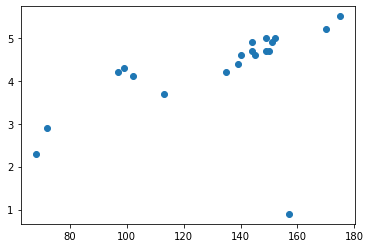

In [51]:
plt.scatter(df['calories'], df['alcohol'])
plt.show()